<a href="https://colab.research.google.com/github/Ruthvikr01/ImageCaptionGeneration/blob/main/AI_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!gdown --id 1Oy0mzq7VnU3ETWZVJMR3A0fYO53nR1RN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Oy0mzq7VnU3ETWZVJMR3A0fYO53nR1RN
To: /content/Images.zip
100% 1.11G/1.11G [00:11<00:00, 98.5MB/s]


In [23]:
!unzip '/content/Images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [24]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [16]:
model=VGG16()
model=Model(inputs=model.inputs,outputs=model.layers[-2].output)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [9]:
features={}
directory=os.path.join(os.getcwd(),'/content/Images')
for img_name in tqdm(os.listdir(directory)):
  img_path=directory+'/'+img_name
  image=load_img(img_path, target_size=(224,224))
  image=img_to_array(image)
  image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
  image=preprocess_input(image)
  feature=model.predict(image, verbose=0)
  image_id=img_name.split('.')[0]
  features[image_id]=feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [10]:
WORKING_DIR = '/content'
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [11]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [25]:
with open(os.path.join(os.getcwd(),'/content/captions.txt'),'r') as f:
  next(f)
  captions_doc=f.read()

In [26]:
mapping={}
for line in tqdm(captions_doc.split('\n')):
  tokens=line.split(',')
  if len(line)<2:
    continue
  image_id,caption=tokens[0], tokens[1:]
  image_id=image_id.split('.')[0]
  caption=" ".join(caption)
  if image_id not in mapping:
    mapping[image_id]=[]
  mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [27]:
len(mapping)

8091

In [28]:
def clean(mapping):
  for key, captions in mapping.items():
    for i in range(len(captions)):
      caption=captions[i]
      caption=caption.lower()
      caption=caption.replace('[^A-Za-z]', '')
      caption=caption.replace('\s+', ' ')
      caption='startseq '+" ".join([word for word in caption.split() if len(word)>1])+ ' endseq'
      captions[i]=caption

In [29]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [30]:
clean(mapping)

In [31]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [32]:
all_captions=[]
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

In [33]:
len(all_captions)

40455

In [34]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [35]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size=len(tokenizer.word_index)+1

In [36]:
vocab_size

8485

In [37]:
max_length=max(len(caption.split()) for caption in all_captions)
max_length

35

In [38]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [39]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
  X1, X2, y=list(), list(), list()
  n=0;
  while 1:
    for key in data_keys:
      n+=1
      captions=mapping[key]
      for caption in captions:
        seq=tokenizer.texts_to_sequences([caption])[0]
        for i in range(1, len(seq)):
          in_seq,out_seq=seq[:i], seq[i]
          in_seq=pad_sequences([in_seq], maxlen=max_length)[0]
          out_seq=to_categorical([out_seq], num_classes=vocab_size)[0]
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)
      if n==batch_size:
        X1, X2, y=np.array(X1), np.array(X2), np.array(y)
        yield[X1,X2], y
        X1, X2, y=list(), list(), list()
        n=0

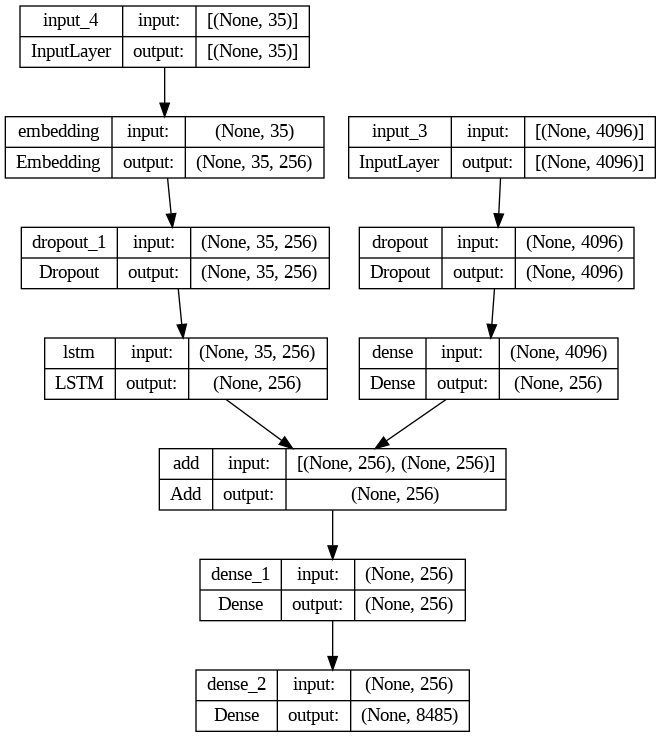

In [40]:
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [42]:
epochs=25
batch_size=32
steps=len(train) // batch_size
for i in range(epochs):
  generator=data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
  model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)

227/227 [==============================] - 70s 309ms/step - loss: 2.0356


In [43]:
model.save(WORKING_DIR+'/proj_model.h5')